# Watershed Cumulative and Monthly: Temp, Precip, ETo

Average temperature, ETo, and precipitation are taken from the daily output for the watershed.

Two pathways are used within the framework.

1. H0: null hypothesis of historical weather statistics
2. H1: alternative hypothesis of weather statistics extracted from down-scaled, global climate model results.

There are four analysis periods

1. Data Period: 1981-2010
2. Projection Period 1: 2011-2040
3. Projection Period 2: 2041-2070
4. Projection Period 3: 2071-2100

## Imports and Parameters

In [1]:
%matplotlib inline

In [2]:
import os
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt
from math import floor, ceil
from copy import deepcopy

In [3]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
# input directories and file roots
IN_DIR = r'C:\Temp\WG_Test_Out\Test1'
OUT_DIR = r'C:\Temp\WG_Test_Out\Test1\Processed'
OUT_ROOT = "DC_WGMN1"
IN_H0ROOT1 = "WS_H0_%s_R" % OUT_ROOT
IN_H1ROOT1 = "WS_H1_%s_R" % OUT_ROOT
IN_ROOT2 = "_DF.pickle"
NUMREAL = 10000

In [5]:
# time periods
TP_DICT = { 1 : [ dt.datetime(1981, 1, 1), dt.datetime(2010, 12, 31)],
            2 : [ dt.datetime(2011, 1, 1), dt.datetime(2040, 12, 31)],
            3 : [ dt.datetime(2041, 1, 1), dt.datetime(2070, 12, 31)],
            4 : [ dt.datetime(2071, 1, 1), dt.datetime(2100, 12, 31)],}

In [6]:
OurQs = np.array( [ round( 0.01 * x, 2 ) for x in range(101) ], dtype=np.float32 )
NumQs = len( OurQs )
NumQs

101

In [7]:
StatsHdsList = list()
for iI in range(NumQs):
    cQ = OurQs[iI]
    Hdr = "%d_ptile" % round(cQ * 100.0)
    StatsHdsList.append( Hdr )
# end of for
StatsHdsList.append( "Average" )
StatsHdsList.append( "Variance" )
StatsHdsList.append( "Skew" )
StatsHdsList.append( "Kurt" )

In [8]:
NumHdrs = len( StatsHdsList )
NumHdrs

105

In [9]:
WS_In_Hdrs = [ "Tmax_C", #0
               "Tmin_C", #1
               "Tave_C", #2
               "Precip_mm", #3
               "ETo_mm", #4
              ]

## Collate DataFrames

### H0

In [10]:
for rR in range( 1, NUMREAL + 1, 1 ):
    if ((rR % 500) == 0):
        print("Working on realization %d" % rR)
    # end if
    InFile = "%s%d%s" % ( IN_H0ROOT1, rR, IN_ROOT2 )
    InFP = os.path.normpath( os.path.join( IN_DIR, InFile ) )
    InDF = pd.read_pickle( InFP, compression='zip' )
    TempDF = InDF[[WS_In_Hdrs[2]]].resample( 'MS', closed='left', label='left' ).mean()
    PreDF = InDF[[WS_In_Hdrs[3]]].resample( 'MS', closed='left', label='left' ).sum()
    EToDF = InDF[[WS_In_Hdrs[4]]].resample( 'MS', closed='left', label='left' ).sum()
    if rR <= 1:
        # data period
        H0Temp1 = TempDF[[WS_In_Hdrs[2]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        H0Temp1["R_%d" % rR] = H0Temp1[WS_In_Hdrs[2]].cumsum( )
        H0Temp1.drop( columns=[WS_In_Hdrs[2]], inplace=True)
        H0Precip1 = PreDF[[WS_In_Hdrs[3]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        H0Precip1["R_%d" % rR] = H0Precip1[WS_In_Hdrs[3]].cumsum( )
        H0Precip1.drop( columns=[WS_In_Hdrs[3]], inplace=True)
        H0ETo1 = EToDF[[WS_In_Hdrs[4]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        H0ETo1["R_%d" % rR] = H0ETo1[WS_In_Hdrs[4]].cumsum( )
        H0ETo1.drop( columns=[WS_In_Hdrs[4]], inplace=True)
        H0MTemp1 = TempDF[[WS_In_Hdrs[2]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        H0MTemp1.columns = ["R_%d" % rR]
        H0MPrecip1 = PreDF[[WS_In_Hdrs[3]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        H0MPrecip1.columns = ["R_%d" % rR]
        H0METo1 = EToDF[[WS_In_Hdrs[4]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        H0METo1.columns = ["R_%d" % rR]
        #  Projection 1
        H0Temp2 = TempDF[[WS_In_Hdrs[2]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        H0Temp2["R_%d" % rR] = H0Temp2[WS_In_Hdrs[2]].cumsum( )
        H0Temp2.drop( columns=[WS_In_Hdrs[2]], inplace=True)
        H0Precip2 = PreDF[[WS_In_Hdrs[3]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        H0Precip2["R_%d" % rR] = H0Precip2[WS_In_Hdrs[3]].cumsum( )
        H0Precip2.drop( columns=[WS_In_Hdrs[3]], inplace=True)
        H0ETo2 = EToDF[[WS_In_Hdrs[4]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        H0ETo2["R_%d" % rR] = H0ETo2[WS_In_Hdrs[4]].cumsum( )
        H0ETo2.drop( columns=[WS_In_Hdrs[4]], inplace=True)
        H0MTemp2 = TempDF[[WS_In_Hdrs[2]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        H0MTemp2.columns = ["R_%d" % rR]
        H0MPrecip2 = PreDF[[WS_In_Hdrs[3]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        H0MPrecip2.columns = ["R_%d" % rR]
        H0METo2 = EToDF[[WS_In_Hdrs[4]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        H0METo2.columns = ["R_%d" % rR]
        #  Projection 2
        H0Temp3 = TempDF[[WS_In_Hdrs[2]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        H0Temp3["R_%d" % rR] = H0Temp3[WS_In_Hdrs[2]].cumsum( )
        H0Temp3.drop( columns=[WS_In_Hdrs[2]], inplace=True)
        H0Precip3 = PreDF[[WS_In_Hdrs[3]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        H0Precip3["R_%d" % rR] = H0Precip3[WS_In_Hdrs[3]].cumsum( )
        H0Precip3.drop( columns=[WS_In_Hdrs[3]], inplace=True)
        H0ETo3 = EToDF[[WS_In_Hdrs[4]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        H0ETo3["R_%d" % rR] = H0ETo3[WS_In_Hdrs[4]].cumsum( )
        H0ETo3.drop( columns=[WS_In_Hdrs[4]], inplace=True)
        H0MTemp3 = TempDF[[WS_In_Hdrs[2]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        H0MTemp3.columns = ["R_%d" % rR]
        H0MPrecip3 = PreDF[[WS_In_Hdrs[3]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        H0MPrecip3.columns = ["R_%d" % rR]
        H0METo3 = EToDF[[WS_In_Hdrs[4]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        H0METo3.columns = ["R_%d" % rR]
        #  Projection 3
        H0Temp4 = TempDF[[WS_In_Hdrs[2]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        H0Temp4["R_%d" % rR] = H0Temp4[WS_In_Hdrs[2]].cumsum( )
        H0Temp4.drop( columns=[WS_In_Hdrs[2]], inplace=True)
        H0Precip4 = PreDF[[WS_In_Hdrs[3]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        H0Precip4["R_%d" % rR] = H0Precip4[WS_In_Hdrs[3]].cumsum( )
        H0Precip4.drop( columns=[WS_In_Hdrs[3]], inplace=True)
        H0ETo4 = EToDF[[WS_In_Hdrs[4]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        H0ETo4["R_%d" % rR] = H0ETo4[WS_In_Hdrs[4]].cumsum( )
        H0ETo4.drop( columns=[WS_In_Hdrs[4]], inplace=True)
        H0MTemp4 = TempDF[[WS_In_Hdrs[2]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        H0MTemp4.columns = ["R_%d" % rR]
        H0MPrecip4 = PreDF[[WS_In_Hdrs[3]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        H0MPrecip4.columns = ["R_%d" % rR]
        H0METo4 = EToDF[[WS_In_Hdrs[4]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        H0METo4.columns = ["R_%d" % rR]
    else:
        # data period
        tmpTmp = TempDF[[WS_In_Hdrs[2]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        tmpTmp["R_%d" % rR] = tmpTmp[WS_In_Hdrs[2]].cumsum( )
        tmpTmp.drop( columns=[WS_In_Hdrs[2]], inplace=True)
        H0Temp1 = H0Temp1.merge( tmpTmp, how='inner', left_index=True, right_index=True )
        tmpPre = PreDF[[WS_In_Hdrs[3]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        tmpPre["R_%d" % rR] = tmpPre[WS_In_Hdrs[3]].cumsum( )
        tmpPre.drop( columns=[WS_In_Hdrs[3]], inplace=True)
        H0Precip1 = H0Precip1.merge( tmpPre, how='inner', left_index=True, right_index=True )
        tmpETo = EToDF[[WS_In_Hdrs[4]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        tmpETo["R_%d" % rR] = tmpETo[WS_In_Hdrs[4]].cumsum( )
        tmpETo.drop( columns=[WS_In_Hdrs[4]], inplace=True)
        H0ETo1 = H0ETo1.merge( tmpETo, how='inner', left_index=True, right_index=True )
        tmpTmp = TempDF[[WS_In_Hdrs[2]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        tmpTmp.columns = ["R_%d" % rR]
        H0MTemp1 = H0MTemp1.merge( tmpTmp,  how='inner', left_index=True, right_index=True )
        tmpPre = PreDF[[WS_In_Hdrs[3]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        tmpPre.columns = ["R_%d" % rR]
        H0MPrecip1 = H0MPrecip1.merge( tmpPre,  how='inner', left_index=True, right_index=True )
        tmpETo = EToDF[[WS_In_Hdrs[4]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        tmpETo.columns = ["R_%d" % rR]
        H0METo1 = H0METo1.merge( tmpETo, how='inner', left_index=True, right_index=True )
        # Projection 1
        tmpTmp = TempDF[[WS_In_Hdrs[2]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        tmpTmp["R_%d" % rR] = tmpTmp[WS_In_Hdrs[2]].cumsum( )
        tmpTmp.drop( columns=[WS_In_Hdrs[2]], inplace=True)
        H0Temp2 = H0Temp2.merge( tmpTmp, how='inner', left_index=True, right_index=True )
        tmpPre = PreDF[[WS_In_Hdrs[3]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        tmpPre["R_%d" % rR] = tmpPre[WS_In_Hdrs[3]].cumsum( )
        tmpPre.drop( columns=[WS_In_Hdrs[3]], inplace=True)
        H0Precip2 = H0Precip2.merge( tmpPre, how='inner', left_index=True, right_index=True )
        tmpETo = EToDF[[WS_In_Hdrs[4]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        tmpETo["R_%d" % rR] = tmpETo[WS_In_Hdrs[4]].cumsum( )
        tmpETo.drop( columns=[WS_In_Hdrs[4]], inplace=True)
        H0ETo2 = H0ETo2.merge( tmpETo, how='inner', left_index=True, right_index=True )
        tmpTmp = TempDF[[WS_In_Hdrs[2]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        tmpTmp.columns = ["R_%d" % rR]
        H0MTemp2 = H0MTemp2.merge( tmpTmp,  how='inner', left_index=True, right_index=True )
        tmpPre = PreDF[[WS_In_Hdrs[3]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        tmpPre.columns = ["R_%d" % rR]
        H0MPrecip2 = H0MPrecip2.merge( tmpPre,  how='inner', left_index=True, right_index=True )
        tmpETo = EToDF[[WS_In_Hdrs[4]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        tmpETo.columns = ["R_%d" % rR]
        H0METo2 = H0METo2.merge( tmpETo, how='inner', left_index=True, right_index=True )
        # Projection 2
        tmpTmp = TempDF[[WS_In_Hdrs[2]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        tmpTmp["R_%d" % rR] = tmpTmp[WS_In_Hdrs[2]].cumsum( )
        tmpTmp.drop( columns=[WS_In_Hdrs[2]], inplace=True)
        H0Temp3 = H0Temp3.merge( tmpTmp, how='inner', left_index=True, right_index=True )
        tmpPre = PreDF[[WS_In_Hdrs[3]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        tmpPre["R_%d" % rR] = tmpPre[WS_In_Hdrs[3]].cumsum( )
        tmpPre.drop( columns=[WS_In_Hdrs[3]], inplace=True)
        H0Precip3 = H0Precip3.merge( tmpPre, how='inner', left_index=True, right_index=True )
        tmpETo = EToDF[[WS_In_Hdrs[4]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        tmpETo["R_%d" % rR] = tmpETo[WS_In_Hdrs[4]].cumsum( )
        tmpETo.drop( columns=[WS_In_Hdrs[4]], inplace=True)
        H0ETo3 = H0ETo3.merge( tmpETo, how='inner', left_index=True, right_index=True )
        tmpTmp = TempDF[[WS_In_Hdrs[2]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        tmpTmp.columns = ["R_%d" % rR]
        H0MTemp3 = H0MTemp3.merge( tmpTmp,  how='inner', left_index=True, right_index=True )
        tmpPre = PreDF[[WS_In_Hdrs[3]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        tmpPre.columns = ["R_%d" % rR]
        H0MPrecip3 = H0MPrecip3.merge( tmpPre,  how='inner', left_index=True, right_index=True )
        tmpETo = EToDF[[WS_In_Hdrs[4]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        tmpETo.columns = ["R_%d" % rR]
        H0METo3 = H0METo3.merge( tmpETo, how='inner', left_index=True, right_index=True )
        # Projection 3
        tmpTmp = TempDF[[WS_In_Hdrs[2]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        tmpTmp["R_%d" % rR] = tmpTmp[WS_In_Hdrs[2]].cumsum( )
        tmpTmp.drop( columns=[WS_In_Hdrs[2]], inplace=True)
        H0Temp4 = H0Temp4.merge( tmpTmp, how='inner', left_index=True, right_index=True )
        tmpPre = PreDF[[WS_In_Hdrs[3]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        tmpPre["R_%d" % rR] = tmpPre[WS_In_Hdrs[3]].cumsum( )
        tmpPre.drop( columns=[WS_In_Hdrs[3]], inplace=True)
        H0Precip4 = H0Precip4.merge( tmpPre, how='inner', left_index=True, right_index=True )
        tmpETo = EToDF[[WS_In_Hdrs[4]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        tmpETo["R_%d" % rR] = tmpETo[WS_In_Hdrs[4]].cumsum( )
        tmpETo.drop( columns=[WS_In_Hdrs[4]], inplace=True)
        H0ETo4 = H0ETo4.merge( tmpETo, how='inner', left_index=True, right_index=True )
        tmpTmp = TempDF[[WS_In_Hdrs[2]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        tmpTmp.columns = ["R_%d" % rR]
        H0MTemp4 = H0MTemp4.merge( tmpTmp,  how='inner', left_index=True, right_index=True )
        tmpPre = PreDF[[WS_In_Hdrs[3]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        tmpPre.columns = ["R_%d" % rR]
        H0MPrecip4 = H0MPrecip4.merge( tmpPre,  how='inner', left_index=True, right_index=True )
        tmpETo = EToDF[[WS_In_Hdrs[4]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        tmpETo.columns = ["R_%d" % rR]
        H0METo4 = H0METo4.merge( tmpETo, how='inner', left_index=True, right_index=True )
    # end if
# end for

Working on realization 500
Working on realization 1000
Working on realization 1500
Working on realization 2000
Working on realization 2500
Working on realization 3000
Working on realization 3500
Working on realization 4000
Working on realization 4500
Working on realization 5000
Working on realization 5500
Working on realization 6000
Working on realization 6500
Working on realization 7000
Working on realization 7500
Working on realization 8000
Working on realization 8500
Working on realization 9000
Working on realization 9500
Working on realization 10000


For loop can take a long time so output now

In [11]:
OFNamer = "CumWS_H0_Precip1_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0Precip1.to_pickle( OFPath, compression='zip' )
#H0Precip1 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "CumWS_H0_Temp1_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0Temp1.to_pickle( OFPath, compression='zip' )
#H0Temp1 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "CumWS_H0_ETo1_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0ETo1.to_pickle( OFPath, compression='zip' )
#H0ETo1 = pd.read_pickle( OFPath, compression='zip' )

In [12]:
OFNamer = "MonWS_H0_Precip1_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0MPrecip1.to_pickle( OFPath, compression='zip' )
#H0MPrecip1 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "MonWS_H0_Temp1_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0MTemp1.to_pickle( OFPath, compression='zip' )
#H0MTemp1 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "MonWS_H0_ETo1_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0METo1.to_pickle( OFPath, compression='zip' )
#H0METo1 = pd.read_pickle( OFPath, compression='zip' )

In [13]:
OFNamer = "CumWS_H0_Precip2_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0Precip2.to_pickle( OFPath, compression='zip' )
#H0Precip2 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "CumWS_H0_Temp2_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0Temp2.to_pickle( OFPath, compression='zip' )
#H0Temp2 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "CumWS_H0_ETo2_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0ETo2.to_pickle( OFPath, compression='zip' )
#H0ETo2 = pd.read_pickle( OFPath, compression='zip' )

In [14]:
OFNamer = "MonWS_H0_Precip2_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0MPrecip2.to_pickle( OFPath, compression='zip' )
#H0MPrecip2 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "MonWS_H0_Temp2_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0MTemp2.to_pickle( OFPath, compression='zip' )
#H0MTemp2 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "MonWS_H0_ETo2_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0METo2.to_pickle( OFPath, compression='zip' )
#H0METo2 = pd.read_pickle( OFPath, compression='zip' )

In [15]:
OFNamer = "CumWS_H0_Precip3_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0Precip3.to_pickle( OFPath, compression='zip' )
#H0Precip3 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "CumWS_H0_Temp3_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0Temp3.to_pickle( OFPath, compression='zip' )
#H0Temp3 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "CumWS_H0_ETo3_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0ETo3.to_pickle( OFPath, compression='zip' )
#H0ETo3 = pd.read_pickle( OFPath, compression='zip' )

In [16]:
OFNamer = "MonWS_H0_Precip3_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0MPrecip3.to_pickle( OFPath, compression='zip' )
#H0MPrecip3 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "MonWS_H0_Temp3_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0MTemp3.to_pickle( OFPath, compression='zip' )
#H0MTemp3 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "MonWS_H0_ETo3_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0METo3.to_pickle( OFPath, compression='zip' )
#H0METo3 = pd.read_pickle( OFPath, compression='zip' )

In [17]:
OFNamer = "CumWS_H0_Precip4_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0Precip4.to_pickle( OFPath, compression='zip' )
#H0Precip4 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "CumWS_H0_Temp4_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0Temp4.to_pickle( OFPath, compression='zip' )
#H0Temp4 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "CumWS_H0_ETo4_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0ETo4.to_pickle( OFPath, compression='zip' )
#H0ETo4 = pd.read_pickle( OFPath, compression='zip' )

In [18]:
OFNamer = "MonWS_H0_Precip4_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0MPrecip4.to_pickle( OFPath, compression='zip' )
#H0MPrecip4 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "MonWS_H0_Temp4_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0MTemp4.to_pickle( OFPath, compression='zip' )
#H0MTemp4 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "MonWS_H0_ETo4_%s.pickle"  % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H0METo4.to_pickle( OFPath, compression='zip' )
#H0METo4 = pd.read_pickle( OFPath, compression='zip' )

### H1

In [19]:
for rR in range( 1, NUMREAL + 1, 1 ):
    if ((rR % 500) == 0):
        print("Working on realization %d" % rR)
    # end if
    InFile = "%s%d%s" % ( IN_H1ROOT1, rR, IN_ROOT2 )
    InFP = os.path.normpath( os.path.join( IN_DIR, InFile ) )
    InDF = pd.read_pickle( InFP, compression='zip' )
    TempDF = InDF[[WS_In_Hdrs[2]]].resample( 'MS', closed='left', label='left' ).mean()
    PreDF = InDF[[WS_In_Hdrs[3]]].resample( 'MS', closed='left', label='left' ).sum()
    if rR <= 1:
        # data period
        H1Temp1 = TempDF[[WS_In_Hdrs[2]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        H1Temp1["R_%d" % rR] = H1Temp1[WS_In_Hdrs[2]].cumsum( )
        H1Temp1.drop( columns=[WS_In_Hdrs[2]], inplace=True)
        H1Precip1 = PreDF[[WS_In_Hdrs[3]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        H1Precip1["R_%d" % rR] = H1Precip1[WS_In_Hdrs[3]].cumsum( )
        H1Precip1.drop( columns=[WS_In_Hdrs[3]], inplace=True)
        H1ETo1 = EToDF[[WS_In_Hdrs[4]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        H1ETo1["R_%d" % rR] = H1ETo1[WS_In_Hdrs[4]].cumsum( )
        H1ETo1.drop( columns=[WS_In_Hdrs[4]], inplace=True)
        H1MTemp1 = TempDF[[WS_In_Hdrs[2]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        H1MTemp1.columns = ["R_%d" % rR]
        H1MPrecip1 = PreDF[[WS_In_Hdrs[3]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        H1MPrecip1.columns = ["R_%d" % rR]
        H1METo1 = EToDF[[WS_In_Hdrs[4]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        H1METo1.columns = ["R_%d" % rR]
        #  Projection 1
        H1Temp2 = TempDF[[WS_In_Hdrs[2]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        H1Temp2["R_%d" % rR] = H1Temp2[WS_In_Hdrs[2]].cumsum( )
        H1Temp2.drop( columns=[WS_In_Hdrs[2]], inplace=True)
        H1Precip2 = PreDF[[WS_In_Hdrs[3]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        H1Precip2["R_%d" % rR] = H1Precip2[WS_In_Hdrs[3]].cumsum( )
        H1Precip2.drop( columns=[WS_In_Hdrs[3]], inplace=True)
        H1ETo2 = EToDF[[WS_In_Hdrs[4]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        H1ETo2["R_%d" % rR] = H1ETo2[WS_In_Hdrs[4]].cumsum( )
        H1ETo2.drop( columns=[WS_In_Hdrs[4]], inplace=True)
        H1MTemp2 = TempDF[[WS_In_Hdrs[2]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        H1MTemp2.columns = ["R_%d" % rR]
        H1MPrecip2 = PreDF[[WS_In_Hdrs[3]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        H1MPrecip2.columns = ["R_%d" % rR]
        H1METo2 = EToDF[[WS_In_Hdrs[4]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        H1METo2.columns = ["R_%d" % rR]
        #  Projection 2
        H1Temp3 = TempDF[[WS_In_Hdrs[2]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        H1Temp3["R_%d" % rR] = H1Temp3[WS_In_Hdrs[2]].cumsum( )
        H1Temp3.drop( columns=[WS_In_Hdrs[2]], inplace=True)
        H1Precip3 = PreDF[[WS_In_Hdrs[3]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        H1Precip3["R_%d" % rR] = H1Precip3[WS_In_Hdrs[3]].cumsum( )
        H1Precip3.drop( columns=[WS_In_Hdrs[3]], inplace=True)
        H1ETo3 = EToDF[[WS_In_Hdrs[4]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        H1ETo3["R_%d" % rR] = H1ETo3[WS_In_Hdrs[4]].cumsum( )
        H1ETo3.drop( columns=[WS_In_Hdrs[4]], inplace=True)
        H1MTemp3 = TempDF[[WS_In_Hdrs[2]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        H1MTemp3.columns = ["R_%d" % rR]
        H1MPrecip3 = PreDF[[WS_In_Hdrs[3]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        H1MPrecip3.columns = ["R_%d" % rR]
        H1METo3 = EToDF[[WS_In_Hdrs[4]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        H1METo3.columns = ["R_%d" % rR]
        #  Projection 3
        H1Temp4 = TempDF[[WS_In_Hdrs[2]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        H1Temp4["R_%d" % rR] = H1Temp4[WS_In_Hdrs[2]].cumsum( )
        H1Temp4.drop( columns=[WS_In_Hdrs[2]], inplace=True)
        H1Precip4 = PreDF[[WS_In_Hdrs[3]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        H1Precip4["R_%d" % rR] = H1Precip4[WS_In_Hdrs[3]].cumsum( )
        H1Precip4.drop( columns=[WS_In_Hdrs[3]], inplace=True)
        H1ETo4 = EToDF[[WS_In_Hdrs[4]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        H1ETo4["R_%d" % rR] = H1ETo4[WS_In_Hdrs[4]].cumsum( )
        H1ETo4.drop( columns=[WS_In_Hdrs[4]], inplace=True)
        H1MTemp4 = TempDF[[WS_In_Hdrs[2]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        H1MTemp4.columns = ["R_%d" % rR]
        H1MPrecip4 = PreDF[[WS_In_Hdrs[3]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        H1MPrecip4.columns = ["R_%d" % rR]
        H1METo4 = EToDF[[WS_In_Hdrs[4]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        H1METo4.columns = ["R_%d" % rR]
    else:
        # data period
        tmpTmp = TempDF[[WS_In_Hdrs[2]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        tmpTmp["R_%d" % rR] = tmpTmp[WS_In_Hdrs[2]].cumsum( )
        tmpTmp.drop( columns=[WS_In_Hdrs[2]], inplace=True)
        H1Temp1 = H1Temp1.merge( tmpTmp, how='inner', left_index=True, right_index=True )
        tmpPre = PreDF[[WS_In_Hdrs[3]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        tmpPre["R_%d" % rR] = tmpPre[WS_In_Hdrs[3]].cumsum( )
        tmpPre.drop( columns=[WS_In_Hdrs[3]], inplace=True)
        H1Precip1 = H1Precip1.merge( tmpPre, how='inner', left_index=True, right_index=True )
        tmpETo = EToDF[[WS_In_Hdrs[4]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        tmpETo["R_%d" % rR] = tmpETo[WS_In_Hdrs[4]].cumsum( )
        tmpETo.drop( columns=[WS_In_Hdrs[4]], inplace=True)
        H1ETo1 = H1ETo1.merge( tmpETo, how='inner', left_index=True, right_index=True )
        tmpTmp = TempDF[[WS_In_Hdrs[2]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        tmpTmp.columns = ["R_%d" % rR]
        H1MTemp1 = H1MTemp1.merge( tmpTmp,  how='inner', left_index=True, right_index=True )
        tmpPre = PreDF[[WS_In_Hdrs[3]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        tmpPre.columns = ["R_%d" % rR]
        H1MPrecip1 = H1MPrecip1.merge( tmpPre,  how='inner', left_index=True, right_index=True )
        tmpETo = EToDF[[WS_In_Hdrs[4]]].loc[TP_DICT[1][0]:TP_DICT[1][1]].copy()
        tmpETo.columns = ["R_%d" % rR]
        H1METo1 = H1METo1.merge( tmpETo, how='inner', left_index=True, right_index=True )
        # Projection 1
        tmpTmp = TempDF[[WS_In_Hdrs[2]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        tmpTmp["R_%d" % rR] = tmpTmp[WS_In_Hdrs[2]].cumsum( )
        tmpTmp.drop( columns=[WS_In_Hdrs[2]], inplace=True)
        H1Temp2 = H1Temp2.merge( tmpTmp, how='inner', left_index=True, right_index=True )
        tmpPre = PreDF[[WS_In_Hdrs[3]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        tmpPre["R_%d" % rR] = tmpPre[WS_In_Hdrs[3]].cumsum( )
        tmpPre.drop( columns=[WS_In_Hdrs[3]], inplace=True)
        H1Precip2 = H1Precip2.merge( tmpPre, how='inner', left_index=True, right_index=True )
        tmpETo = EToDF[[WS_In_Hdrs[4]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        tmpETo["R_%d" % rR] = tmpETo[WS_In_Hdrs[4]].cumsum( )
        tmpETo.drop( columns=[WS_In_Hdrs[4]], inplace=True)
        H1ETo2 = H1ETo2.merge( tmpETo, how='inner', left_index=True, right_index=True )
        tmpTmp = TempDF[[WS_In_Hdrs[2]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        tmpTmp.columns = ["R_%d" % rR]
        H1MTemp2 = H1MTemp2.merge( tmpTmp,  how='inner', left_index=True, right_index=True )
        tmpPre = PreDF[[WS_In_Hdrs[3]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        tmpPre.columns = ["R_%d" % rR]
        H1MPrecip2 = H1MPrecip2.merge( tmpPre,  how='inner', left_index=True, right_index=True )
        tmpETo = EToDF[[WS_In_Hdrs[4]]].loc[TP_DICT[2][0]:TP_DICT[2][1]].copy()
        tmpETo.columns = ["R_%d" % rR]
        H1METo2 = H1METo2.merge( tmpETo, how='inner', left_index=True, right_index=True )
        # Projection 2
        tmpTmp = TempDF[[WS_In_Hdrs[2]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        tmpTmp["R_%d" % rR] = tmpTmp[WS_In_Hdrs[2]].cumsum( )
        tmpTmp.drop( columns=[WS_In_Hdrs[2]], inplace=True)
        H1Temp3 = H1Temp3.merge( tmpTmp, how='inner', left_index=True, right_index=True )
        tmpPre = PreDF[[WS_In_Hdrs[3]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        tmpPre["R_%d" % rR] = tmpPre[WS_In_Hdrs[3]].cumsum( )
        tmpPre.drop( columns=[WS_In_Hdrs[3]], inplace=True)
        H1Precip3 = H1Precip3.merge( tmpPre, how='inner', left_index=True, right_index=True )
        tmpETo = EToDF[[WS_In_Hdrs[4]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        tmpETo["R_%d" % rR] = tmpETo[WS_In_Hdrs[4]].cumsum( )
        tmpETo.drop( columns=[WS_In_Hdrs[4]], inplace=True)
        H1ETo3 = H1ETo3.merge( tmpETo, how='inner', left_index=True, right_index=True )
        tmpTmp = TempDF[[WS_In_Hdrs[2]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        tmpTmp.columns = ["R_%d" % rR]
        H1MTemp3 = H1MTemp3.merge( tmpTmp,  how='inner', left_index=True, right_index=True )
        tmpPre = PreDF[[WS_In_Hdrs[3]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        tmpPre.columns = ["R_%d" % rR]
        H1MPrecip3 = H1MPrecip3.merge( tmpPre,  how='inner', left_index=True, right_index=True )
        tmpETo = EToDF[[WS_In_Hdrs[4]]].loc[TP_DICT[3][0]:TP_DICT[3][1]].copy()
        tmpETo.columns = ["R_%d" % rR]
        H1METo3 = H1METo3.merge( tmpETo, how='inner', left_index=True, right_index=True )
        # Projection 3
        tmpTmp = TempDF[[WS_In_Hdrs[2]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        tmpTmp["R_%d" % rR] = tmpTmp[WS_In_Hdrs[2]].cumsum( )
        tmpTmp.drop( columns=[WS_In_Hdrs[2]], inplace=True)
        H1Temp4 = H1Temp4.merge( tmpTmp, how='inner', left_index=True, right_index=True )
        tmpPre = PreDF[[WS_In_Hdrs[3]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        tmpPre["R_%d" % rR] = tmpPre[WS_In_Hdrs[3]].cumsum( )
        tmpPre.drop( columns=[WS_In_Hdrs[3]], inplace=True)
        H1Precip4 = H1Precip4.merge( tmpPre, how='inner', left_index=True, right_index=True )
        tmpETo = EToDF[[WS_In_Hdrs[4]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        tmpETo["R_%d" % rR] = tmpETo[WS_In_Hdrs[4]].cumsum( )
        tmpETo.drop( columns=[WS_In_Hdrs[4]], inplace=True)
        H1ETo4 = H1ETo4.merge( tmpETo, how='inner', left_index=True, right_index=True )
        tmpTmp = TempDF[[WS_In_Hdrs[2]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        tmpTmp.columns = ["R_%d" % rR]
        H1MTemp4 = H1MTemp4.merge( tmpTmp,  how='inner', left_index=True, right_index=True )
        tmpPre = PreDF[[WS_In_Hdrs[3]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        tmpPre.columns = ["R_%d" % rR]
        H1MPrecip4 = H1MPrecip4.merge( tmpPre,  how='inner', left_index=True, right_index=True )
        tmpETo = EToDF[[WS_In_Hdrs[4]]].loc[TP_DICT[4][0]:TP_DICT[4][1]].copy()
        tmpETo.columns = ["R_%d" % rR]
        H1METo4 = H1METo4.merge( tmpETo, how='inner', left_index=True, right_index=True )
    # end if
# end for

Working on realization 500
Working on realization 1000
Working on realization 1500
Working on realization 2000
Working on realization 2500
Working on realization 3000
Working on realization 3500
Working on realization 4000
Working on realization 4500
Working on realization 5000
Working on realization 5500
Working on realization 6000
Working on realization 6500
Working on realization 7000
Working on realization 7500
Working on realization 8000
Working on realization 8500
Working on realization 9000
Working on realization 9500
Working on realization 10000


For loop can take a long time so output now

In [20]:
OFNamer = "CumWS_H1_Precip1_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1Precip1.to_pickle( OFPath, compression='zip' )
#H1Precip1 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "CumWS_H1_Temp1_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1Temp1.to_pickle( OFPath, compression='zip' )
#H1Temp1 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "CumWS_H1_ETo1_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1ETo1.to_pickle( OFPath, compression='zip' )
#H1ETo1 = pd.read_pickle( OFPath, compression='zip' )

In [21]:
OFNamer = "MonWS_H1_Precip1_%s.pickle"  % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1MPrecip1.to_pickle( OFPath, compression='zip' )
#H1MPrecip1 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "MonWS_H1_Temp1_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1MTemp1.to_pickle( OFPath, compression='zip' )
#H1MTemp1 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "MonWS_H1_ETo1_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1METo1.to_pickle( OFPath, compression='zip' )
#H1METo1 = pd.read_pickle( OFPath, compression='zip' )

In [22]:
OFNamer = "CumWS_H1_Precip2_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1Precip2.to_pickle( OFPath, compression='zip' )
#H1Precip2 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "CumWS_H1_Temp2_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1Temp2.to_pickle( OFPath, compression='zip' )
#H1Temp2 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "CumWS_H1_ETo2_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1ETo2.to_pickle( OFPath, compression='zip' )
#H1ETo2 = pd.read_pickle( OFPath, compression='zip' )

In [23]:
OFNamer = "MonWS_H1_Precip2_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1MPrecip2.to_pickle( OFPath, compression='zip' )
#H1MPrecip2 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "MonWS_H1_Temp2_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1MTemp2.to_pickle( OFPath, compression='zip' )
#H1MTemp2 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "MonWS_H1_ETo2_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1METo2.to_pickle( OFPath, compression='zip' )
#H1METo2 = pd.read_pickle( OFPath, compression='zip' )

In [24]:
OFNamer = "CumWS_H1_Precip3_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1Precip3.to_pickle( OFPath, compression='zip' )
#H1Precip3 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "CumWS_H1_Temp3_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1Temp3.to_pickle( OFPath, compression='zip' )
#H1Temp3 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "CumWS_H1_ETo3_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1ETo3.to_pickle( OFPath, compression='zip' )
#H1ETo3 = pd.read_pickle( OFPath, compression='zip' )

In [25]:
OFNamer = "MonWS_H1_Precip3_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1MPrecip3.to_pickle( OFPath, compression='zip' )
#H1MPrecip3 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "MonWS_H1_Temp3_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1MTemp3.to_pickle( OFPath, compression='zip' )
#H1MTemp3 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "MonWS_H1_ETo3_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1METo3.to_pickle( OFPath, compression='zip' )
#H1METo3 = pd.read_pickle( OFPath, compression='zip' )

In [26]:
OFNamer = "CumWS_H1_Precip4_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1Precip4.to_pickle( OFPath, compression='zip' )
#H1Precip4 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "CumWS_H1_Temp4_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1Temp4.to_pickle( OFPath, compression='zip' )
#H1Temp4 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "CumWS_H1_ETo4_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1ETo4.to_pickle( OFPath, compression='zip' )
#H1ETo4 = pd.read_pickle( OFPath, compression='zip' )

In [27]:
OFNamer = "MonWS_H1_Precip4_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1MPrecip4.to_pickle( OFPath, compression='zip' )
#H1MPrecip4 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "MonWS_H1_Temp4_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1MTemp4.to_pickle( OFPath, compression='zip' )
#H1MTemp4 = pd.read_pickle( OFPath, compression='zip' )
OFNamer = "MonWS_H1_ETo4_%s.pickle" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
H1METo4.to_pickle( OFPath, compression='zip' )
#H1METo4 = pd.read_pickle( OFPath, compression='zip' )

Now use pivot tables to get formats for calculation of Koppen climate classification

In [28]:
AllPCols = list( H0MPrecip1.columns )

In [29]:
H0MPrecip1["Year"] = H0MPrecip1.index.year
H0MPrecip1["Month"] = H0MPrecip1.index.month
H0MTemp1["Year"] = H0MTemp1.index.year
H0MTemp1["Month"] = H0MTemp1.index.month
H0METo1["Year"] = H0METo1.index.year
H0METo1["Month"] = H0METo1.index.month
H1MPrecip1["Year"] = H1MPrecip1.index.year
H1MPrecip1["Month"] = H1MPrecip1.index.month
H1MTemp1["Year"] = H1MTemp1.index.year
H1MTemp1["Month"] = H1MTemp1.index.month
H1METo1["Year"] = H1METo1.index.year
H1METo1["Month"] = H1METo1.index.month
H0MPrecip1["Average"] = H0MPrecip1.mean( axis=1 )
H0MTemp1["Average"] = H0MTemp1.mean( axis=1 )
H0METo1["Average"] = H0METo1.mean( axis=1 )
H1MPrecip1["Average"] = H1MPrecip1.mean( axis=1 )
H1MTemp1["Average"] = H1MTemp1.mean( axis=1 )
H1METo1["Average"] = H1METo1.mean( axis=1 )

In [30]:
H0MPrecip2["Year"] = H0MPrecip2.index.year
H0MPrecip2["Month"] = H0MPrecip2.index.month
H0MTemp2["Year"] = H0MTemp2.index.year
H0MTemp2["Month"] = H0MTemp2.index.month
H0METo2["Year"] = H0METo2.index.year
H0METo2["Month"] = H0METo2.index.month
H1MPrecip2["Year"] = H1MPrecip2.index.year
H1MPrecip2["Month"] = H1MPrecip2.index.month
H1MTemp2["Year"] = H1MTemp2.index.year
H1MTemp2["Month"] = H1MTemp2.index.month
H1METo2["Year"] = H1METo2.index.year
H1METo2["Month"] = H1METo2.index.month
H0MPrecip2["Average"] = H0MPrecip2.mean( axis=1 )
H0MTemp2["Average"] = H0MTemp2.mean( axis=1 )
H0METo2["Average"] = H0METo2.mean( axis=1 )
H1MPrecip2["Average"] = H1MPrecip2.mean( axis=1 )
H1MTemp2["Average"] = H1MTemp2.mean( axis=1 )
H1METo2["Average"] = H1METo2.mean( axis=1 )

In [31]:
H0MPrecip3["Year"] = H0MPrecip3.index.year
H0MPrecip3["Month"] = H0MPrecip3.index.month
H0MTemp3["Year"] = H0MTemp3.index.year
H0MTemp3["Month"] = H0MTemp3.index.month
H0METo3["Year"] = H0METo3.index.year
H0METo3["Month"] = H0METo3.index.month
H1MPrecip3["Year"] = H1MPrecip3.index.year
H1MPrecip3["Month"] = H1MPrecip3.index.month
H1MTemp3["Year"] = H1MTemp3.index.year
H1MTemp3["Month"] = H1MTemp3.index.month
H1METo3["Year"] = H1METo3.index.year
H1METo3["Month"] = H1METo3.index.month
H0MPrecip3["Average"] = H0MPrecip3.mean( axis=1 )
H0MTemp3["Average"] = H0MTemp3.mean( axis=1 )
H0METo3["Average"] = H0METo3.mean( axis=1 )
H1MPrecip3["Average"] = H1MPrecip3.mean( axis=1 )
H1MTemp3["Average"] = H1MTemp3.mean( axis=1 )
H1METo3["Average"] = H1METo3.mean( axis=1 )

In [32]:
H0MPrecip4["Year"] = H0MPrecip4.index.year
H0MPrecip4["Month"] = H0MPrecip4.index.month
H0MTemp4["Year"] = H0MTemp4.index.year
H0MTemp4["Month"] = H0MTemp4.index.month
H0METo4["Year"] = H0METo4.index.year
H0METo4["Month"] = H0METo4.index.month
H1MPrecip4["Year"] = H1MPrecip4.index.year
H1MPrecip4["Month"] = H1MPrecip4.index.month
H1MTemp4["Year"] = H1MTemp4.index.year
H1MTemp4["Month"] = H1MTemp4.index.month
H1METo4["Year"] = H1METo4.index.year
H1METo4["Month"] = H1METo4.index.month
H0MPrecip4["Average"] = H0MPrecip4.mean( axis=1 )
H0MTemp4["Average"] = H0MTemp4.mean( axis=1 )
H0METo4["Average"] = H0METo4.mean( axis=1 )
H1MPrecip4["Average"] = H1MPrecip4.mean( axis=1 )
H1MTemp4["Average"] = H1MTemp4.mean( axis=1 )
H1METo4["Average"] = H1METo4.mean( axis=1 )

In [33]:
H0PTMPre1 = H0MPrecip1.pivot( index="Year", columns="Month", values="Average" )
H0PTMTmp1 = H0MTemp1.pivot( index="Year", columns="Month", values="Average" )
H0PTMETo1 = H0METo1.pivot( index="Year", columns="Month", values="Average" )
H0PTMPre2 = H0MPrecip2.pivot( index="Year", columns="Month", values="Average" )
H0PTMTmp2 = H0MTemp2.pivot( index="Year", columns="Month", values="Average" )
H0PTMETo2 = H0METo2.pivot( index="Year", columns="Month", values="Average" )
H0PTMPre3 = H0MPrecip3.pivot( index="Year", columns="Month", values="Average" )
H0PTMTmp3 = H0MTemp3.pivot( index="Year", columns="Month", values="Average" )
H0PTMETo3 = H0METo3.pivot( index="Year", columns="Month", values="Average" )
H0PTMPre4 = H0MPrecip4.pivot( index="Year", columns="Month", values="Average" )
H0PTMTmp4 = H0MTemp4.pivot( index="Year", columns="Month", values="Average" )
H0PTMETo4 = H0METo4.pivot( index="Year", columns="Month", values="Average" )

In [34]:
H1PTMPre1 = H1MPrecip1.pivot( index="Year", columns="Month", values="Average" )
H1PTMTmp1 = H1MTemp1.pivot( index="Year", columns="Month", values="Average" )
H1PTMETo1 = H1METo1.pivot( index="Year", columns="Month", values="Average" )
H1PTMPre2 = H1MPrecip2.pivot( index="Year", columns="Month", values="Average" )
H1PTMTmp2 = H1MTemp2.pivot( index="Year", columns="Month", values="Average" )
H1PTMETo2 = H1METo2.pivot( index="Year", columns="Month", values="Average" )
H1PTMPre3 = H1MPrecip3.pivot( index="Year", columns="Month", values="Average" )
H1PTMTmp3 = H1MTemp3.pivot( index="Year", columns="Month", values="Average" )
H1PTMETo3 = H1METo3.pivot( index="Year", columns="Month", values="Average" )
H1PTMPre4 = H1MPrecip4.pivot( index="Year", columns="Month", values="Average" )
H1PTMTmp4 = H1MTemp4.pivot( index="Year", columns="Month", values="Average" )
H1PTMETo4 = H1METo4.pivot( index="Year", columns="Month", values="Average" )

Output to a spreadsheet

In [35]:
OFNamer = "WSMon_%s_PivotTables.xlsx" % OUT_ROOT
OFPath = os.path.normpath( os.path.join( OUT_DIR, OFNamer ) )
with pd.ExcelWriter( OFPath ) as writer:
    H0PTMPre1.to_excel( writer, sheet_name='H0_Precip1', na_rep=str(np.nan),
                        index_label="Year" )
    H0PTMTmp1.to_excel( writer, sheet_name='H0_Temp1', na_rep=str(np.nan),
                        index_label="Year" )
    H0PTMETo1.to_excel( writer, sheet_name='H0_ETo1', na_rep=str(np.nan),
                        index_label="Year" )
    H0PTMPre2.to_excel( writer, sheet_name='H0_Precip2', na_rep=str(np.nan),
                        index_label="Year" ) 
    H0PTMTmp2.to_excel( writer, sheet_name='H0_Temp2', na_rep=str(np.nan),
                        index_label="Year" )
    H0PTMETo2.to_excel( writer, sheet_name='H0_ETo2', na_rep=str(np.nan),
                        index_label="Year" )
    H0PTMPre3.to_excel( writer, sheet_name='H0_Precip3', na_rep=str(np.nan),
                        index_label="Year" )
    H0PTMTmp3.to_excel( writer, sheet_name='H0_Temp3', na_rep=str(np.nan),
                        index_label="Year" )
    H0PTMETo3.to_excel( writer, sheet_name='H0_ETo3', na_rep=str(np.nan),
                        index_label="Year" )
    H0PTMPre4.to_excel( writer, sheet_name='H0_Precip4', na_rep=str(np.nan),
                        index_label="Year" ) 
    H0PTMTmp4.to_excel( writer, sheet_name='H0_Temp4', na_rep=str(np.nan),
                        index_label="Year" )
    H0PTMETo4.to_excel( writer, sheet_name='H0_ETo4', na_rep=str(np.nan),
                        index_label="Year" )
    H1PTMPre1.to_excel( writer, sheet_name='H1_Precip1', na_rep=str(np.nan),
                        index_label="Year" )
    H1PTMTmp1.to_excel( writer, sheet_name='H1_Temp1', na_rep=str(np.nan),
                        index_label="Year" )
    H1PTMETo1.to_excel( writer, sheet_name='H1_ETo1', na_rep=str(np.nan),
                        index_label="Year" )
    H1PTMPre2.to_excel( writer, sheet_name='H1_Precip2', na_rep=str(np.nan),
                        index_label="Year" ) 
    H1PTMTmp2.to_excel( writer, sheet_name='H1_Temp2', na_rep=str(np.nan),
                        index_label="Year" )
    H1PTMETo2.to_excel( writer, sheet_name='H1_ETo2', na_rep=str(np.nan),
                        index_label="Year" )
    H1PTMPre3.to_excel( writer, sheet_name='H1_Precip3', na_rep=str(np.nan),
                        index_label="Year" )
    H1PTMTmp3.to_excel( writer, sheet_name='H1_Temp3', na_rep=str(np.nan),
                        index_label="Year" )
    H1PTMETo3.to_excel( writer, sheet_name='H1_ETo3', na_rep=str(np.nan),
                        index_label="Year" )
    H1PTMPre4.to_excel( writer, sheet_name='H1_Precip4', na_rep=str(np.nan),
                        index_label="Year" ) 
    H1PTMTmp4.to_excel( writer, sheet_name='H1_Temp4', na_rep=str(np.nan),
                        index_label="Year" )
    H1PTMETo4.to_excel( writer, sheet_name='H1_ETo4', na_rep=str(np.nan),
                        index_label="Year" )
# end with

## Calculate Time History Stats

### H0

In [36]:
DictH0Pre1 = dict()
DictH0Pre2 = dict()
DictH0Pre3 = dict()
DictH0Pre4 = dict()
DictH0Tmp1 = dict()
DictH0Tmp2 = dict()
DictH0Tmp3 = dict()
DictH0Tmp4 = dict()
DictH0ETo1 = dict()
DictH0ETo2 = dict()
DictH0ETo3 = dict()
DictH0ETo4 = dict()
hdrCnt = 0
# start out by doing the percentiles
for iI in range(NumQs):
    curQ = OurQs[iI]
    DictH0Pre1[StatsHdsList[hdrCnt]] = H0Precip1.quantile( q=curQ, axis=1 ).to_numpy()
    DictH0Pre2[StatsHdsList[hdrCnt]] = H0Precip2.quantile( q=curQ, axis=1 ).to_numpy()
    DictH0Pre3[StatsHdsList[hdrCnt]] = H0Precip3.quantile( q=curQ, axis=1 ).to_numpy()
    DictH0Pre4[StatsHdsList[hdrCnt]] = H0Precip4.quantile( q=curQ, axis=1 ).to_numpy()
    DictH0Tmp1[StatsHdsList[hdrCnt]] = H0Temp1.quantile( q=curQ, axis=1 ).to_numpy()
    DictH0Tmp2[StatsHdsList[hdrCnt]] = H0Temp2.quantile( q=curQ, axis=1 ).to_numpy()
    DictH0Tmp3[StatsHdsList[hdrCnt]] = H0Temp3.quantile( q=curQ, axis=1 ).to_numpy()
    DictH0Tmp4[StatsHdsList[hdrCnt]] = H0Temp4.quantile( q=curQ, axis=1 ).to_numpy()
    DictH0ETo1[StatsHdsList[hdrCnt]] = H0ETo1.quantile( q=curQ, axis=1 ).to_numpy()
    DictH0ETo2[StatsHdsList[hdrCnt]] = H0ETo2.quantile( q=curQ, axis=1 ).to_numpy()
    DictH0ETo3[StatsHdsList[hdrCnt]] = H0ETo3.quantile( q=curQ, axis=1 ).to_numpy()
    DictH0ETo4[StatsHdsList[hdrCnt]] = H0ETo4.quantile( q=curQ, axis=1 ).to_numpy()
    hdrCnt += 1
# end for
DictH0Pre1[StatsHdsList[hdrCnt]] = H0Precip1.mean( axis=1 ).to_numpy()
DictH0Pre2[StatsHdsList[hdrCnt]] = H0Precip2.mean( axis=1 ).to_numpy()
DictH0Pre3[StatsHdsList[hdrCnt]] = H0Precip3.mean( axis=1 ).to_numpy()
DictH0Pre4[StatsHdsList[hdrCnt]] = H0Precip4.mean( axis=1 ).to_numpy()
DictH0Tmp1[StatsHdsList[hdrCnt]] = H0Temp1.mean( axis=1 ).to_numpy()
DictH0Tmp2[StatsHdsList[hdrCnt]] = H0Temp2.mean( axis=1 ).to_numpy()
DictH0Tmp3[StatsHdsList[hdrCnt]] = H0Temp3.mean( axis=1 ).to_numpy()
DictH0Tmp4[StatsHdsList[hdrCnt]] = H0Temp4.mean( axis=1 ).to_numpy()
DictH0ETo1[StatsHdsList[hdrCnt]] = H0ETo1.mean( axis=1 ).to_numpy()
DictH0ETo2[StatsHdsList[hdrCnt]] = H0ETo2.mean( axis=1 ).to_numpy()
DictH0ETo3[StatsHdsList[hdrCnt]] = H0ETo3.mean( axis=1 ).to_numpy()
DictH0ETo4[StatsHdsList[hdrCnt]] = H0ETo4.mean( axis=1 ).to_numpy()
hdrCnt += 1

In [37]:
DictH0Pre1[StatsHdsList[hdrCnt]] = H0Precip1.var( axis=1 ).to_numpy()
DictH0Pre2[StatsHdsList[hdrCnt]] = H0Precip2.var( axis=1 ).to_numpy()
DictH0Pre3[StatsHdsList[hdrCnt]] = H0Precip3.var( axis=1 ).to_numpy()
DictH0Pre4[StatsHdsList[hdrCnt]] = H0Precip4.var( axis=1 ).to_numpy()
DictH0Tmp1[StatsHdsList[hdrCnt]] = H0Temp1.var( axis=1 ).to_numpy()
DictH0Tmp2[StatsHdsList[hdrCnt]] = H0Temp2.var( axis=1 ).to_numpy()
DictH0Tmp3[StatsHdsList[hdrCnt]] = H0Temp3.var( axis=1 ).to_numpy()
DictH0Tmp4[StatsHdsList[hdrCnt]] = H0Temp4.var( axis=1 ).to_numpy()
DictH0ETo1[StatsHdsList[hdrCnt]] = H0ETo1.var( axis=1 ).to_numpy()
DictH0ETo2[StatsHdsList[hdrCnt]] = H0ETo2.var( axis=1 ).to_numpy()
DictH0ETo3[StatsHdsList[hdrCnt]] = H0ETo3.var( axis=1 ).to_numpy()
DictH0ETo4[StatsHdsList[hdrCnt]] = H0ETo4.var( axis=1 ).to_numpy()
hdrCnt += 1

In [38]:
DictH0Pre1[StatsHdsList[hdrCnt]] = H0Precip1.skew( axis=1 ).to_numpy()
DictH0Pre2[StatsHdsList[hdrCnt]] = H0Precip2.skew( axis=1 ).to_numpy()
DictH0Pre3[StatsHdsList[hdrCnt]] = H0Precip3.skew( axis=1 ).to_numpy()
DictH0Pre4[StatsHdsList[hdrCnt]] = H0Precip4.skew( axis=1 ).to_numpy()
DictH0Tmp1[StatsHdsList[hdrCnt]] = H0Temp1.skew( axis=1 ).to_numpy()
DictH0Tmp2[StatsHdsList[hdrCnt]] = H0Temp2.skew( axis=1 ).to_numpy()
DictH0Tmp3[StatsHdsList[hdrCnt]] = H0Temp3.skew( axis=1 ).to_numpy()
DictH0Tmp4[StatsHdsList[hdrCnt]] = H0Temp4.skew( axis=1 ).to_numpy()
DictH0ETo1[StatsHdsList[hdrCnt]] = H0ETo1.skew( axis=1 ).to_numpy()
DictH0ETo2[StatsHdsList[hdrCnt]] = H0ETo2.skew( axis=1 ).to_numpy()
DictH0ETo3[StatsHdsList[hdrCnt]] = H0ETo3.skew( axis=1 ).to_numpy()
DictH0ETo4[StatsHdsList[hdrCnt]] = H0ETo4.skew( axis=1 ).to_numpy()
hdrCnt += 1

In [39]:
DictH0Pre1[StatsHdsList[hdrCnt]] = H0Precip1.kurt( axis=1 ).to_numpy()
DictH0Pre2[StatsHdsList[hdrCnt]] = H0Precip2.kurt( axis=1 ).to_numpy()
DictH0Pre3[StatsHdsList[hdrCnt]] = H0Precip3.kurt( axis=1 ).to_numpy()
DictH0Pre4[StatsHdsList[hdrCnt]] = H0Precip4.kurt( axis=1 ).to_numpy()
DictH0Tmp1[StatsHdsList[hdrCnt]] = H0Temp1.kurt( axis=1 ).to_numpy()
DictH0Tmp2[StatsHdsList[hdrCnt]] = H0Temp2.kurt( axis=1 ).to_numpy()
DictH0Tmp3[StatsHdsList[hdrCnt]] = H0Temp3.kurt( axis=1 ).to_numpy()
DictH0Tmp4[StatsHdsList[hdrCnt]] = H0Temp4.kurt( axis=1 ).to_numpy()
DictH0ETo1[StatsHdsList[hdrCnt]] = H0ETo1.kurt( axis=1 ).to_numpy()
DictH0ETo2[StatsHdsList[hdrCnt]] = H0ETo2.kurt( axis=1 ).to_numpy()
DictH0ETo3[StatsHdsList[hdrCnt]] = H0ETo3.kurt( axis=1 ).to_numpy()
DictH0ETo4[StatsHdsList[hdrCnt]] = H0ETo4.kurt( axis=1 ).to_numpy()

Make DataFrames from the stats

In [40]:
TimIndex1 = H0Precip1.index
TimIndex2 = H0Precip2.index
TimIndex3 = H0Precip3.index
TimIndex4 = H0Precip4.index

In [41]:
H0PreStats1 = pd.DataFrame(index=TimIndex1, data=DictH0Pre1 )
H0PreStats2 = pd.DataFrame(index=TimIndex2, data=DictH0Pre2 )
H0PreStats3 = pd.DataFrame(index=TimIndex3, data=DictH0Pre3 )
H0PreStats4 = pd.DataFrame(index=TimIndex4, data=DictH0Pre4 )

In [42]:
H0TempStats1 = pd.DataFrame(index=TimIndex1, data=DictH0Tmp1 )
H0TempStats2 = pd.DataFrame(index=TimIndex2, data=DictH0Tmp2 )
H0TempStats3 = pd.DataFrame(index=TimIndex3, data=DictH0Tmp3 )
H0TempStats4 = pd.DataFrame(index=TimIndex4, data=DictH0Tmp4 )

In [43]:
H0EToStats1 = pd.DataFrame(index=TimIndex1, data=DictH0ETo1 )
H0EToStats2 = pd.DataFrame(index=TimIndex2, data=DictH0ETo2 )
H0EToStats3 = pd.DataFrame(index=TimIndex3, data=DictH0ETo3 )
H0EToStats4 = pd.DataFrame(index=TimIndex4, data=DictH0ETo4 )

Output to a spreadsheet

In [44]:
OutFileName = "CumWS_H0_%s_ProcessMonthly_Stats.xlsx" % OUT_ROOT
OutFP = os.path.normpath( os.path.join( OUT_DIR, OutFileName ) )
with pd.ExcelWriter( OutFP ) as writer:
    H0PreStats1.to_excel( writer, sheet_name="Precip_1", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H0PreStats2.to_excel( writer, sheet_name="Precip_2", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H0PreStats3.to_excel( writer, sheet_name="Precip_3", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H0PreStats4.to_excel( writer, sheet_name="Precip_4", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H0TempStats1.to_excel( writer, sheet_name="Temp_1", index_label="Date",
                           columns=StatsHdsList, na_rep=str(np.nan) )
    H0TempStats2.to_excel( writer, sheet_name="Temp_2", index_label="Date",
                           columns=StatsHdsList, na_rep=str(np.nan) )
    H0TempStats3.to_excel( writer, sheet_name="Temp_3", index_label="Date",
                           columns=StatsHdsList, na_rep=str(np.nan) )
    H0TempStats4.to_excel( writer, sheet_name="Temp_4", index_label="Date",
                           columns=StatsHdsList, na_rep=str(np.nan) )
    H0EToStats1.to_excel( writer, sheet_name="ETop_1", index_label="Date",
                           columns=StatsHdsList, na_rep=str(np.nan) )
    H0EToStats2.to_excel( writer, sheet_name="ETo_2", index_label="Date",
                           columns=StatsHdsList, na_rep=str(np.nan) )
    H0EToStats3.to_excel( writer, sheet_name="ETo_3", index_label="Date",
                           columns=StatsHdsList, na_rep=str(np.nan) )
    H0EToStats4.to_excel( writer, sheet_name="ETo_4", index_label="Date",
                           columns=StatsHdsList, na_rep=str(np.nan) )
# end with

### H1

In [45]:
DictH1Pre1 = dict()
DictH1Pre2 = dict()
DictH1Pre3 = dict()
DictH1Pre4 = dict()
DictH1Tmp1 = dict()
DictH1Tmp2 = dict()
DictH1Tmp3 = dict()
DictH1Tmp4 = dict()
DictH1ETo1 = dict()
DictH1ETo2 = dict()
DictH1ETo3 = dict()
DictH1ETo4 = dict()
hdrCnt = 0
# start out by doing the percentiles
for iI in range(NumQs):
    curQ = OurQs[iI]
    DictH1Pre1[StatsHdsList[hdrCnt]] = H1Precip1.quantile( q=curQ, axis=1 ).to_numpy()
    DictH1Pre2[StatsHdsList[hdrCnt]] = H1Precip2.quantile( q=curQ, axis=1 ).to_numpy()
    DictH1Pre3[StatsHdsList[hdrCnt]] = H1Precip3.quantile( q=curQ, axis=1 ).to_numpy()
    DictH1Pre4[StatsHdsList[hdrCnt]] = H1Precip4.quantile( q=curQ, axis=1 ).to_numpy()
    DictH1Tmp1[StatsHdsList[hdrCnt]] = H1Temp1.quantile( q=curQ, axis=1 ).to_numpy()
    DictH1Tmp2[StatsHdsList[hdrCnt]] = H1Temp2.quantile( q=curQ, axis=1 ).to_numpy()
    DictH1Tmp3[StatsHdsList[hdrCnt]] = H1Temp3.quantile( q=curQ, axis=1 ).to_numpy()
    DictH1Tmp4[StatsHdsList[hdrCnt]] = H1Temp4.quantile( q=curQ, axis=1 ).to_numpy()
    DictH1ETo1[StatsHdsList[hdrCnt]] = H1ETo1.quantile( q=curQ, axis=1 ).to_numpy()
    DictH1ETo2[StatsHdsList[hdrCnt]] = H1ETo2.quantile( q=curQ, axis=1 ).to_numpy()
    DictH1ETo3[StatsHdsList[hdrCnt]] = H1ETo3.quantile( q=curQ, axis=1 ).to_numpy()
    DictH1ETo4[StatsHdsList[hdrCnt]] = H1ETo4.quantile( q=curQ, axis=1 ).to_numpy()
    hdrCnt += 1
# end for
DictH1Pre1[StatsHdsList[hdrCnt]] = H1Precip1.mean( axis=1 ).to_numpy()
DictH1Pre2[StatsHdsList[hdrCnt]] = H1Precip2.mean( axis=1 ).to_numpy()
DictH1Pre3[StatsHdsList[hdrCnt]] = H1Precip3.mean( axis=1 ).to_numpy()
DictH1Pre4[StatsHdsList[hdrCnt]] = H1Precip4.mean( axis=1 ).to_numpy()
DictH1Tmp1[StatsHdsList[hdrCnt]] = H1Temp1.mean( axis=1 ).to_numpy()
DictH1Tmp2[StatsHdsList[hdrCnt]] = H1Temp2.mean( axis=1 ).to_numpy()
DictH1Tmp3[StatsHdsList[hdrCnt]] = H1Temp3.mean( axis=1 ).to_numpy()
DictH1Tmp4[StatsHdsList[hdrCnt]] = H1Temp4.mean( axis=1 ).to_numpy()
DictH1ETo1[StatsHdsList[hdrCnt]] = H1ETo1.mean( axis=1 ).to_numpy()
DictH1ETo2[StatsHdsList[hdrCnt]] = H1ETo2.mean( axis=1 ).to_numpy()
DictH1ETo3[StatsHdsList[hdrCnt]] = H1ETo3.mean( axis=1 ).to_numpy()
DictH1ETo4[StatsHdsList[hdrCnt]] = H1ETo4.mean( axis=1 ).to_numpy()
hdrCnt += 1

In [46]:
DictH1Pre1[StatsHdsList[hdrCnt]] = H1Precip1.var( axis=1 ).to_numpy()
DictH1Pre2[StatsHdsList[hdrCnt]] = H1Precip2.var( axis=1 ).to_numpy()
DictH1Pre3[StatsHdsList[hdrCnt]] = H1Precip3.var( axis=1 ).to_numpy()
DictH1Pre4[StatsHdsList[hdrCnt]] = H1Precip4.var( axis=1 ).to_numpy()
DictH1Tmp1[StatsHdsList[hdrCnt]] = H1Temp1.var( axis=1 ).to_numpy()
DictH1Tmp2[StatsHdsList[hdrCnt]] = H1Temp2.var( axis=1 ).to_numpy()
DictH1Tmp3[StatsHdsList[hdrCnt]] = H1Temp3.var( axis=1 ).to_numpy()
DictH1Tmp4[StatsHdsList[hdrCnt]] = H1Temp4.var( axis=1 ).to_numpy()
DictH1ETo1[StatsHdsList[hdrCnt]] = H1ETo1.var( axis=1 ).to_numpy()
DictH1ETo2[StatsHdsList[hdrCnt]] = H1ETo2.var( axis=1 ).to_numpy()
DictH1ETo3[StatsHdsList[hdrCnt]] = H1ETo3.var( axis=1 ).to_numpy()
DictH1ETo4[StatsHdsList[hdrCnt]] = H1ETo4.var( axis=1 ).to_numpy()
hdrCnt += 1

In [47]:
DictH1Pre1[StatsHdsList[hdrCnt]] = H1Precip1.skew( axis=1 ).to_numpy()
DictH1Pre2[StatsHdsList[hdrCnt]] = H1Precip2.skew( axis=1 ).to_numpy()
DictH1Pre3[StatsHdsList[hdrCnt]] = H1Precip3.skew( axis=1 ).to_numpy()
DictH1Pre4[StatsHdsList[hdrCnt]] = H1Precip4.skew( axis=1 ).to_numpy()
DictH1Tmp1[StatsHdsList[hdrCnt]] = H1Temp1.skew( axis=1 ).to_numpy()
DictH1Tmp2[StatsHdsList[hdrCnt]] = H1Temp2.skew( axis=1 ).to_numpy()
DictH1Tmp3[StatsHdsList[hdrCnt]] = H1Temp3.skew( axis=1 ).to_numpy()
DictH1Tmp4[StatsHdsList[hdrCnt]] = H1Temp4.skew( axis=1 ).to_numpy()
DictH1ETo1[StatsHdsList[hdrCnt]] = H1ETo1.skew( axis=1 ).to_numpy()
DictH1ETo2[StatsHdsList[hdrCnt]] = H1ETo2.skew( axis=1 ).to_numpy()
DictH1ETo3[StatsHdsList[hdrCnt]] = H1ETo3.skew( axis=1 ).to_numpy()
DictH1ETo4[StatsHdsList[hdrCnt]] = H1ETo4.skew( axis=1 ).to_numpy()
hdrCnt += 1

In [48]:
DictH1Pre1[StatsHdsList[hdrCnt]] = H1Precip1.kurt( axis=1 ).to_numpy()
DictH1Pre2[StatsHdsList[hdrCnt]] = H1Precip2.kurt( axis=1 ).to_numpy()
DictH1Pre3[StatsHdsList[hdrCnt]] = H1Precip3.kurt( axis=1 ).to_numpy()
DictH1Pre4[StatsHdsList[hdrCnt]] = H1Precip4.kurt( axis=1 ).to_numpy()
DictH1Tmp1[StatsHdsList[hdrCnt]] = H1Temp1.kurt( axis=1 ).to_numpy()
DictH1Tmp2[StatsHdsList[hdrCnt]] = H1Temp2.kurt( axis=1 ).to_numpy()
DictH1Tmp3[StatsHdsList[hdrCnt]] = H1Temp3.kurt( axis=1 ).to_numpy()
DictH1Tmp4[StatsHdsList[hdrCnt]] = H1Temp4.kurt( axis=1 ).to_numpy()
DictH1ETo1[StatsHdsList[hdrCnt]] = H1ETo1.kurt( axis=1 ).to_numpy()
DictH1ETo2[StatsHdsList[hdrCnt]] = H1ETo2.kurt( axis=1 ).to_numpy()
DictH1ETo3[StatsHdsList[hdrCnt]] = H1ETo3.kurt( axis=1 ).to_numpy()
DictH1ETo4[StatsHdsList[hdrCnt]] = H1ETo4.kurt( axis=1 ).to_numpy()

Make DataFrames from the stats

In [49]:
H1PreStats1 = pd.DataFrame(index=TimIndex1, data=DictH1Pre1 )
H1PreStats2 = pd.DataFrame(index=TimIndex2, data=DictH1Pre2 )
H1PreStats3 = pd.DataFrame(index=TimIndex3, data=DictH1Pre3 )
H1PreStats4 = pd.DataFrame(index=TimIndex4, data=DictH1Pre4 )

In [50]:
H1TempStats1 = pd.DataFrame(index=TimIndex1, data=DictH1Tmp1 )
H1TempStats2 = pd.DataFrame(index=TimIndex2, data=DictH1Tmp2 )
H1TempStats3 = pd.DataFrame(index=TimIndex3, data=DictH1Tmp3 )
H1TempStats4 = pd.DataFrame(index=TimIndex4, data=DictH1Tmp4 )

In [51]:
H1EToStats1 = pd.DataFrame(index=TimIndex1, data=DictH1ETo1 )
H1EToStats2 = pd.DataFrame(index=TimIndex2, data=DictH1ETo2 )
H1EToStats3 = pd.DataFrame(index=TimIndex3, data=DictH1ETo3 )
H1EToStats4 = pd.DataFrame(index=TimIndex4, data=DictH1ETo4 )

Output to a spreadsheet

In [52]:
OutFileName = "CumWS_H1_%s_ProcessMonthly_Stats.xlsx" % OUT_ROOT
OutFP = os.path.normpath( os.path.join( OUT_DIR, OutFileName ) )
with pd.ExcelWriter( OutFP ) as writer:
    H1PreStats1.to_excel( writer, sheet_name="Precip_1", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H1PreStats2.to_excel( writer, sheet_name="Precip_2", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H1PreStats3.to_excel( writer, sheet_name="Precip_3", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H1PreStats4.to_excel( writer, sheet_name="Precip_4", index_label="Date",
                        columns=StatsHdsList, na_rep=str(np.nan) )
    H1TempStats1.to_excel( writer, sheet_name="Temp_1", index_label="Date",
                           columns=StatsHdsList, na_rep=str(np.nan) )
    H1TempStats2.to_excel( writer, sheet_name="Temp_2", index_label="Date",
                           columns=StatsHdsList, na_rep=str(np.nan) )
    H1TempStats3.to_excel( writer, sheet_name="Temp_3", index_label="Date",
                           columns=StatsHdsList, na_rep=str(np.nan) )
    H1TempStats4.to_excel( writer, sheet_name="Temp_4", index_label="Date",
                           columns=StatsHdsList, na_rep=str(np.nan) )
    H1EToStats1.to_excel( writer, sheet_name="ETo_1", index_label="Date",
                           columns=StatsHdsList, na_rep=str(np.nan) )
    H1EToStats2.to_excel( writer, sheet_name="ETo_2", index_label="Date",
                           columns=StatsHdsList, na_rep=str(np.nan) )
    H1EToStats3.to_excel( writer, sheet_name="ETo_3", index_label="Date",
                           columns=StatsHdsList, na_rep=str(np.nan) )
    H1EToStats4.to_excel( writer, sheet_name="ETo_4", index_label="Date",
                           columns=StatsHdsList, na_rep=str(np.nan) )
# end with

## Time History Plots

### Precip

In [53]:
NumD1 = len( H0PreStats1 )
NumP1 = len( H0PreStats2 )
NumP2 = len( H0PreStats3 )
NumP3 = len( H0PreStats4 )
NumD1, NumP1, NumP2, NumP3

(360, 360, 360, 360)

In [54]:
IndexD1 = H0PreStats1.index[NumD1-1]
IndexP1 = H0PreStats2.index[NumP1-1]
IndexP2 = H0PreStats3.index[NumP2-1]
IndexP3 = H0PreStats4.index[NumP3-1]
IndexD1, IndexP1, IndexP2, IndexP3

(Timestamp('2010-12-01 00:00:00', freq='MS'),
 Timestamp('2040-12-01 00:00:00', freq='MS'),
 Timestamp('2070-12-01 00:00:00', freq='MS'),
 Timestamp('2100-12-01 00:00:00', freq='MS'))

In [55]:
H0PreD1AveTot = H0PreStats1.at[IndexD1, StatsHdsList[101]]
H0PreP1AveTot = H0PreStats2.at[IndexP1, StatsHdsList[101]] + H0PreD1AveTot
H0PreP2AveTot = H0PreStats3.at[IndexP2, StatsHdsList[101]] + H0PreP1AveTot
H0PreP3AveTot = H0PreStats4.at[IndexP3, StatsHdsList[101]] + H0PreP2AveTot
H0PreD1AveTot, H0PreP1AveTot, H0PreP2AveTot, H0PreP3AveTot

(18031.245704608504, 36054.619566755064, 54082.17307079365, 72110.50773363918)

In [56]:
H0PreAllAve = H0PreStats1[[StatsHdsList[101]]].to_numpy()
H0PreAllAve = np.append( H0PreAllAve, 
                         H0PreStats2[[StatsHdsList[101]]].to_numpy() + H0PreD1AveTot )
H0PreAllAve = np.append( H0PreAllAve, 
                         H0PreStats3[[StatsHdsList[101]]].to_numpy() + H0PreP1AveTot )
H0PreAllAve = np.append( H0PreAllAve, 
                         H0PreStats4[[StatsHdsList[101]]].to_numpy() + H0PreP2AveTot )
len( H0PreAllAve )

1440

In [57]:
H1PreD1AveTot = H1PreStats1.at[IndexD1, StatsHdsList[101]]
H1PreP1AveTot = H1PreStats2.at[IndexP1, StatsHdsList[101]] + H1PreD1AveTot
H1PreP2AveTot = H1PreStats3.at[IndexP2, StatsHdsList[101]] + H1PreP1AveTot
H1PreP3AveTot = H1PreStats4.at[IndexP3, StatsHdsList[101]] + H1PreP2AveTot
H1PreD1AveTot, H1PreP1AveTot, H1PreP2AveTot, H1PreP3AveTot 

(18031.2440081906, 41995.30980397161, 65675.12007287805, 89245.58385650915)

In [58]:
H1PreAllAve = H1PreStats1[[StatsHdsList[101]]].to_numpy()
H1PreAllAve = np.append( H1PreAllAve, 
                         H1PreStats2[[StatsHdsList[101]]].to_numpy() + H1PreD1AveTot )
H1PreAllAve = np.append( H1PreAllAve, 
                         H1PreStats3[[StatsHdsList[101]]].to_numpy() + H1PreP1AveTot )
H1PreAllAve = np.append( H1PreAllAve, 
                         H1PreStats4[[StatsHdsList[101]]].to_numpy() + H1PreP2AveTot )
len( H1PreAllAve )

1440

25th and 75th percentiles

In [59]:
H0PreD1P25Tot = H0PreStats1.at[IndexD1, StatsHdsList[25]]
H0PreP1P25Tot = H0PreStats2.at[IndexP1, StatsHdsList[25]] + H0PreD1P25Tot
H0PreP2P25Tot = H0PreStats3.at[IndexP2, StatsHdsList[25]] + H0PreP1P25Tot
H0PreP3P25Tot = H0PreStats4.at[IndexP3, StatsHdsList[25]] + H0PreP2P25Tot
H0PreD1P25Tot, H0PreP1P25Tot, H0PreP2P25Tot, H0PreP3P25Tot 

(17513.777809350442, 35011.980455611134, 52516.84575086774, 70024.72160380262)

In [60]:
H0PreD1P75Tot = H0PreStats1.at[IndexD1, StatsHdsList[75]]
H0PreP1P75Tot = H0PreStats2.at[IndexP1, StatsHdsList[75]] + H0PreD1P75Tot
H0PreP2P75Tot = H0PreStats3.at[IndexP2, StatsHdsList[75]] + H0PreP1P75Tot
H0PreP3P75Tot = H0PreStats4.at[IndexP3, StatsHdsList[75]] + H0PreP2P75Tot
H0PreD1P75Tot, H0PreP1P75Tot, H0PreP2P75Tot, H0PreP3P75Tot 

(18540.20337662478, 37076.459651398836, 55624.732986146475, 74164.70572939805)

In [61]:
H0PreAllP25 = H0PreStats1[[StatsHdsList[25]]].to_numpy()
H0PreAllP25 = np.append( H0PreAllP25, 
                         H0PreStats2[[StatsHdsList[25]]].to_numpy() + H0PreD1P25Tot )
H0PreAllP25 = np.append( H0PreAllP25, 
                         H0PreStats3[[StatsHdsList[25]]].to_numpy() + H0PreP1P25Tot )
H0PreAllP25 = np.append( H0PreAllP25, 
                         H0PreStats4[[StatsHdsList[25]]].to_numpy() + H0PreP2P25Tot )
len( H0PreAllP25 )

1440

In [62]:
H0PreAllP75 = H0PreStats1[[StatsHdsList[75]]].to_numpy()
H0PreAllP75 = np.append( H0PreAllP75, 
                         H0PreStats2[[StatsHdsList[75]]].to_numpy() + H0PreD1P75Tot )
H0PreAllP75 = np.append( H0PreAllP75, 
                         H0PreStats3[[StatsHdsList[75]]].to_numpy() + H0PreP1P75Tot )
H0PreAllP75 = np.append( H0PreAllP75, 
                         H0PreStats4[[StatsHdsList[75]]].to_numpy() + H0PreP2P75Tot )
len( H0PreAllP75 )

1440

In [63]:
H1PreD1P25Tot = H1PreStats1.at[IndexD1, StatsHdsList[25]]
H1PreP1P25Tot = H1PreStats2.at[IndexP1, StatsHdsList[25]] + H1PreD1P25Tot
H1PreP2P25Tot = H1PreStats3.at[IndexP2, StatsHdsList[25]] + H1PreP1P25Tot
H1PreP3P25Tot = H1PreStats4.at[IndexP3, StatsHdsList[25]] + H1PreP2P25Tot
H1PreD1P25Tot, H1PreP1P25Tot, H1PreP2P25Tot, H1PreP3P25Tot 

(17513.777809350442, 40823.21457430847, 63861.190711479416, 86758.19981466525)

In [64]:
H1PreD1P75Tot = H1PreStats1.at[IndexD1, StatsHdsList[75]]
H1PreP1P75Tot = H1PreStats2.at[IndexP1, StatsHdsList[75]] + H1PreD1P75Tot
H1PreP2P75Tot = H1PreStats3.at[IndexP2, StatsHdsList[75]] + H1PreP1P75Tot
H1PreP3P75Tot = H1PreStats4.at[IndexP3, StatsHdsList[75]] + H1PreP2P75Tot
H1PreD1P75Tot, H1PreP1P75Tot, H1PreP2P75Tot, H1PreP3P75Tot 

(18540.20337662478, 43147.867624355, 67452.61079021097, 91699.30494511998)

In [65]:
MinPrecip = 10000.0

In [66]:
MaxPrecip = 120000.0

In [67]:
H1PreAllP25 = H1PreStats1[[StatsHdsList[25]]].to_numpy()
H1PreAllP25 = np.append( H1PreAllP25, 
                         H1PreStats2[[StatsHdsList[25]]].to_numpy() + H1PreD1P25Tot )
H1PreAllP25 = np.append( H1PreAllP25, 
                         H1PreStats3[[StatsHdsList[25]]].to_numpy() + H1PreP1P25Tot )
H1PreAllP25 = np.append( H1PreAllP25, 
                         H1PreStats4[[StatsHdsList[25]]].to_numpy() + H1PreP2P25Tot )
len( H1PreAllP25 )

1440

In [68]:
H1PreAllP75 = H1PreStats1[[StatsHdsList[75]]].to_numpy()
H1PreAllP75 = np.append( H1PreAllP75, 
                         H1PreStats2[[StatsHdsList[75]]].to_numpy() + H1PreD1P75Tot )
H1PreAllP75 = np.append( H1PreAllP75, 
                         H1PreStats3[[StatsHdsList[75]]].to_numpy() + H1PreP1P75Tot )
H1PreAllP75 = np.append( H1PreAllP75, 
                         H1PreStats4[[StatsHdsList[75]]].to_numpy() + H1PreP2P75Tot )
len( H1PreAllP75 )

1440

In [69]:
H0FillValues = H0PreAllP25.tolist()
tmpList1 = H0PreAllP75.tolist()
tmpList2 = tmpList1[::-1]
H0FillValues.extend( tmpList2 )

In [70]:
H1FillValues = H1PreAllP25.tolist()
tmpList1 = H1PreAllP75.tolist()
tmpList2 = tmpList1[::-1]
H1FillValues.extend( tmpList2 )

In [71]:
FillIndex = list( H0PreStats1.index.to_pydatetime() )
FillIndex.extend( list(H0PreStats2.index.to_pydatetime() ) )
FillIndex.extend( list(H0PreStats3.index.to_pydatetime() ) )
FillIndex.extend( list(H0PreStats4.index.to_pydatetime() ) )
VPlotIndex = deepcopy( FillIndex )
tmpList1 = list(H0PreStats4.index.to_pydatetime() )
tmpList2 = tmpList1[::-1]
FillIndex.extend( tmpList2 )
tmpList1 = list(H0PreStats3.index.to_pydatetime() )
tmpList2 = tmpList1[::-1]
FillIndex.extend( tmpList2 )
tmpList1 = list(H0PreStats2.index.to_pydatetime() )
tmpList2 = tmpList1[::-1]
FillIndex.extend( tmpList2 )
tmpList1 = list(H0PreStats1.index.to_pydatetime() )
tmpList2 = tmpList1[::-1]
FillIndex.extend( tmpList2 )

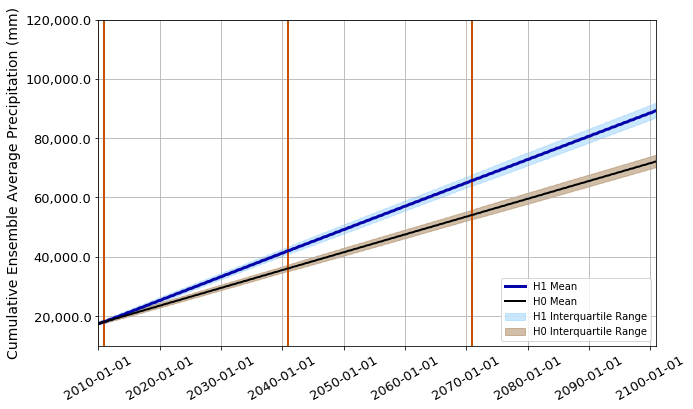

In [72]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinPrecip, MaxPrecip], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinPrecip, MaxPrecip], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinPrecip, MaxPrecip], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.fill( FillIndex, H1FillValues, color="xkcd:light blue", alpha=0.5, 
           label="H1 Interquartile Range")
ax11.fill( FillIndex, H0FillValues, color="xkcd:puce", alpha=0.5, 
           label="H0 Interquartile Range")
ax11.plot( VPlotIndex, H1PreAllAve, linestyle='-',
           linewidth=3, color='xkcd:royal blue', label='H1 Mean' )
ax11.plot( VPlotIndex, H0PreAllAve, linestyle='-',
           linewidth=2, color='xkcd:black', label='H0 Mean' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_ylim( (MinPrecip, MaxPrecip) )
ax11.grid(True, axis='y', which='both')
#ax11.set_title("Probabilistic Discharge", fontsize=16)
#ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Cumulative Ensemble Average Precipitation (mm)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower right' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )

### Temperature

In [73]:
H0TempD1AveTot = H0TempStats1.at[IndexD1, StatsHdsList[101]]
H0TempP1AveTot = H0TempStats2.at[IndexP1, StatsHdsList[101]] + H0TempD1AveTot
H0TempP2AveTot = H0TempStats3.at[IndexP2, StatsHdsList[101]] + H0TempP1AveTot
H0TempP3AveTot = H0TempStats4.at[IndexP3, StatsHdsList[101]] + H0TempP2AveTot
H0TempD1AveTot, H0TempP1AveTot, H0TempP2AveTot, H0TempP3AveTot 

(6676.4453, 13351.828, 20028.348, 26704.059)

In [74]:
H0TempAllAve = H0TempStats1[[StatsHdsList[101]]].to_numpy()
H0TempAllAve = np.append( H0TempAllAve, 
                         H0TempStats2[[StatsHdsList[101]]].to_numpy() + H0TempD1AveTot )
H0TempAllAve = np.append( H0TempAllAve, 
                         H0TempStats3[[StatsHdsList[101]]].to_numpy() + H0TempP1AveTot )
H0TempAllAve = np.append( H0TempAllAve, 
                         H0TempStats4[[StatsHdsList[101]]].to_numpy() + H0TempP2AveTot )
len( H0TempAllAve )

1440

In [75]:
H1TempD1AveTot = H1TempStats1.at[IndexD1, StatsHdsList[101]]
H1TempP1AveTot = H1TempStats2.at[IndexP1, StatsHdsList[101]] + H1TempD1AveTot
H1TempP2AveTot = H1TempStats3.at[IndexP2, StatsHdsList[101]] + H1TempP1AveTot
H1TempP3AveTot = H1TempStats4.at[IndexP3, StatsHdsList[101]] + H1TempP2AveTot
H1TempD1AveTot, H1TempP1AveTot, H1TempP2AveTot, H1TempP3AveTot 

(6676.446, 14097.871, 21941.012, 30182.682)

In [76]:
H1TempAllAve = H1TempStats1[[StatsHdsList[101]]].to_numpy()
H1TempAllAve = np.append( H1TempAllAve, 
                         H1TempStats2[[StatsHdsList[101]]].to_numpy() + H1TempD1AveTot )
H1TempAllAve = np.append( H1TempAllAve, 
                         H1TempStats3[[StatsHdsList[101]]].to_numpy() + H1TempP1AveTot )
H1TempAllAve = np.append( H1TempAllAve, 
                         H1TempStats4[[StatsHdsList[101]]].to_numpy() + H1TempP2AveTot )
len( H1TempAllAve )

1440

In [77]:
H0TempD1P25Tot = H0TempStats1.at[IndexD1, StatsHdsList[25]]
H0TempP1P25Tot = H0TempStats2.at[IndexP1, StatsHdsList[25]] + H0TempD1P25Tot
H0TempP2P25Tot = H0TempStats3.at[IndexP2, StatsHdsList[25]] + H0TempP1P25Tot
H0TempP3P25Tot = H0TempStats4.at[IndexP3, StatsHdsList[25]] + H0TempP2P25Tot
H0TempD1P25Tot, H0TempP1P25Tot, H0TempP2P25Tot, H0TempP3P25Tot

(6648.2686767578125,
 13294.788330078125,
 19942.335083007812,
 26589.254760742188)

In [78]:
H0TempD1P75Tot = H0TempStats1.at[IndexD1, StatsHdsList[75]]
H0TempP1P75Tot = H0TempStats2.at[IndexP1, StatsHdsList[75]] + H0TempD1P75Tot
H0TempP2P75Tot = H0TempStats3.at[IndexP2, StatsHdsList[75]] + H0TempP1P75Tot
H0TempP3P75Tot = H0TempStats4.at[IndexP3, StatsHdsList[75]] + H0TempP2P75Tot
H0TempD1P75Tot, H0TempP1P75Tot, H0TempP2P75Tot, H0TempP3P75Tot 

(6704.2740478515625, 13407.996459960938, 20113.235717773438, 26817.75341796875)

In [79]:
H0TempAllP25 = H0TempStats1[[StatsHdsList[25]]].to_numpy()
H0TempAllP25 = np.append( H0TempAllP25, 
                         H0TempStats2[[StatsHdsList[25]]].to_numpy() + H0TempD1P25Tot )
H0TempAllP25 = np.append( H0TempAllP25, 
                         H0TempStats3[[StatsHdsList[25]]].to_numpy() + H0TempP1P25Tot )
H0TempAllP25 = np.append( H0TempAllP25, 
                         H0TempStats4[[StatsHdsList[25]]].to_numpy() + H0TempP2P25Tot )
len( H0TempAllP25 )

1440

In [80]:
H0TempAllP75 = H0TempStats1[[StatsHdsList[75]]].to_numpy()
H0TempAllP75 = np.append( H0TempAllP75, 
                         H0TempStats2[[StatsHdsList[75]]].to_numpy() + H0TempD1P75Tot )
H0TempAllP75 = np.append( H0TempAllP75, 
                         H0TempStats3[[StatsHdsList[75]]].to_numpy() + H0TempP1P75Tot )
H0TempAllP75 = np.append( H0TempAllP75, 
                         H0TempStats4[[StatsHdsList[75]]].to_numpy() + H0TempP2P75Tot )
len( H0TempAllP75 )

1440

In [81]:
H1TempD1P25Tot = H1TempStats1.at[IndexD1, StatsHdsList[25]]
H1TempP1P25Tot = H1TempStats2.at[IndexP1, StatsHdsList[25]] + H1TempD1P25Tot
H1TempP2P25Tot = H1TempStats3.at[IndexP2, StatsHdsList[25]] + H1TempP1P25Tot
H1TempP3P25Tot = H1TempStats4.at[IndexP3, StatsHdsList[25]] + H1TempP2P25Tot
H1TempD1P25Tot, H1TempP1P25Tot, H1TempP2P25Tot, H1TempP3P25Tot 

(6648.2686767578125,
 14040.694091796875,
 21854.616455078125,
 30065.941162109375)

In [82]:
H1TempD1P75Tot = H1TempStats1.at[IndexD1, StatsHdsList[75]]
H1TempP1P75Tot = H1TempStats2.at[IndexP1, StatsHdsList[75]] + H1TempD1P75Tot
H1TempP2P75Tot = H1TempStats3.at[IndexP2, StatsHdsList[75]] + H1TempP1P75Tot
H1TempP3P75Tot = H1TempStats4.at[IndexP3, StatsHdsList[75]] + H1TempP2P75Tot
H1TempD1P75Tot, H1TempP1P75Tot, H1TempP2P75Tot, H1TempP3P75Tot 

(6704.2740478515625, 14154.4111328125, 22026.821411132812, 30299.347045898438)

In [83]:
MaxTemp = 40000

In [84]:
MinTemp = 0.0

In [85]:
H1TempAllP25 = H1TempStats1[[StatsHdsList[25]]].to_numpy()
H1TempAllP25 = np.append( H1TempAllP25, 
                         H1TempStats2[[StatsHdsList[25]]].to_numpy() + H1TempD1P25Tot )
H1TempAllP25 = np.append( H1TempAllP25, 
                         H1TempStats3[[StatsHdsList[25]]].to_numpy() + H1TempP1P25Tot )
H1TempAllP25 = np.append( H1TempAllP25, 
                         H1TempStats4[[StatsHdsList[25]]].to_numpy() + H1TempP2P25Tot )
len( H1TempAllP25 )

1440

In [86]:
H1TempAllP75 = H1TempStats1[[StatsHdsList[75]]].to_numpy()
H1TempAllP75 = np.append( H1TempAllP75, 
                         H1TempStats2[[StatsHdsList[75]]].to_numpy() + H1TempD1P75Tot )
H1TempAllP75 = np.append( H1TempAllP75, 
                         H1TempStats3[[StatsHdsList[75]]].to_numpy() + H1TempP1P75Tot )
H1TempAllP75 = np.append( H1TempAllP75, 
                         H1TempStats4[[StatsHdsList[75]]].to_numpy() + H1TempP2P75Tot )
len( H1TempAllP75 )

1440

In [87]:
H0FTempValues = H0TempAllP25.tolist()
tmpList1 = H0TempAllP75.tolist()
tmpList2 = tmpList1[::-1]
H0FTempValues.extend( tmpList2 )

In [88]:
H1FTempValues = H1TempAllP25.tolist()
tmpList1 = H1TempAllP75.tolist()
tmpList2 = tmpList1[::-1]
H1FTempValues.extend( tmpList2 )

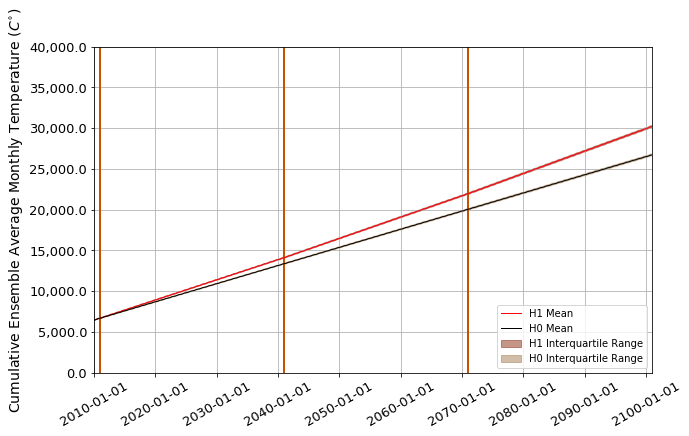

In [89]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinTemp, MaxTemp], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinTemp, MaxTemp], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinTemp, MaxTemp], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax11.fill( FillIndex, H1FTempValues, color="xkcd:red brown", alpha=0.5, 
           label="H1 Interquartile Range")
ax11.fill( FillIndex, H0FTempValues, color="xkcd:puce", alpha=0.5, 
           label="H0 Interquartile Range")
ax11.plot( VPlotIndex, H1TempAllAve, linestyle='-',
           linewidth=1, color='xkcd:bright red', label='H1 Mean' )
ax11.plot( VPlotIndex, H0TempAllAve, linestyle='-',
           linewidth=1, color='xkcd:black', label='H0 Mean' )
ax11.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax11.set_ylim( (MinTemp, MaxTemp) )
ax11.grid(True, axis='y', which='both')
#ax11.set_title("Probabilistic Discharge", fontsize=16)
#ax11.set_xlabel('Day of the Year', fontsize=14 )
ax11.set_ylabel('Cumulative Ensemble Average Monthly Temperature ($C^{\circ} $)', fontsize=14)
ax11.grid( b=True )
ax11.legend( loc='lower right' )
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.tick_params(axis='x', which='major', labelrotation=30.0)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )